<a href="https://colab.research.google.com/github/yuting-tseng/stock_predict/blob/master/stock_AAPL_201901.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Finance Predict

ref: 
1. [ML預測股價](https://www.finlab.tw/%E8%B6%85%E7%B0%A1%E5%96%AE-Machine-Learning-%E9%A0%90%E6%B8%AC%E8%82%A1%E5%83%B9/)
2. [stock module github](https://github.com/WillKoehrsen/Data-Analysis/tree/master/stocker)

In [0]:
# !git clone https://github.com/koreal6803/Stocker.git
# !pip install -r Stocker/requirements.txt

In [0]:
import warnings
import pandas as pd
from Stocker.stocker import Stocker

warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('Stocker/AAPL.csv', index_col='Date', parse_dates=['Date'])
price = df['Adj Close'].squeeze()
price.head()

Date
1980-12-12    0.023106
1980-12-15    0.021900
1980-12-16    0.020293
1980-12-17    0.020795
1980-12-18    0.021398
Name: Adj Close, dtype: float64

In [8]:
tsmc = Stocker(price)

the stock Stocker Initialized. Data covers 1980-12-12 00:00:00 to 2019-01-22 00:00:00.


Predicted Price on 2019-04-22 00:00:00 = $134.16


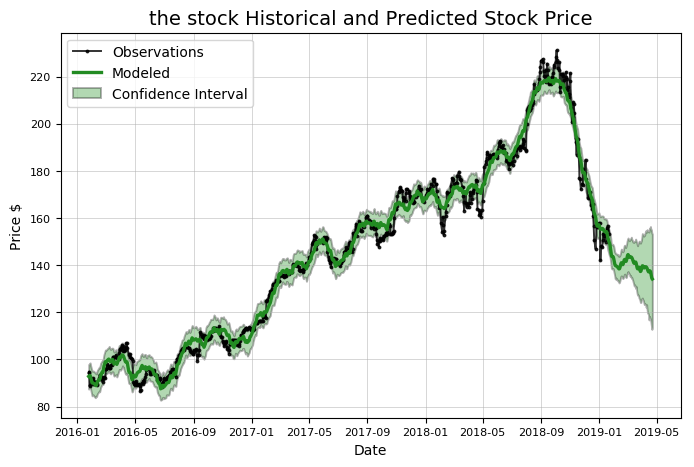

In [9]:
model, model_data = tsmc.create_prophet_model(days=90)


Prediction Range: 2018-01-22 00:00:00 to 2019-01-22 00:00:00.

Predicted price on 2019-01-19 00:00:00 = $228.60.
Actual price on    2019-01-18 00:00:00 = $156.82.

Average Absolute Error on Training Data = $2.97.
Average Absolute Error on Testing  Data = $22.99.

When the model predicted an increase, the price increased 50.66% of the time.
When the model predicted a  decrease, the price decreased  44.90% of the time.

The actual value was within the 80% confidence interval 30.28% of the time.


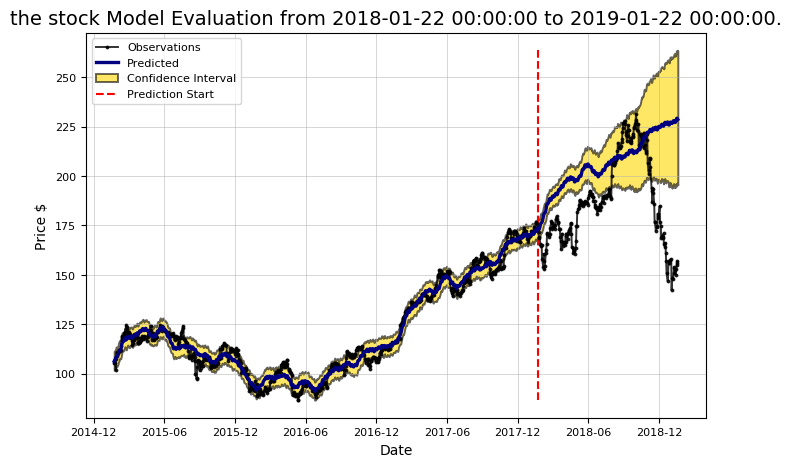

In [10]:
tsmc.evaluate_prediction(end_date=None)

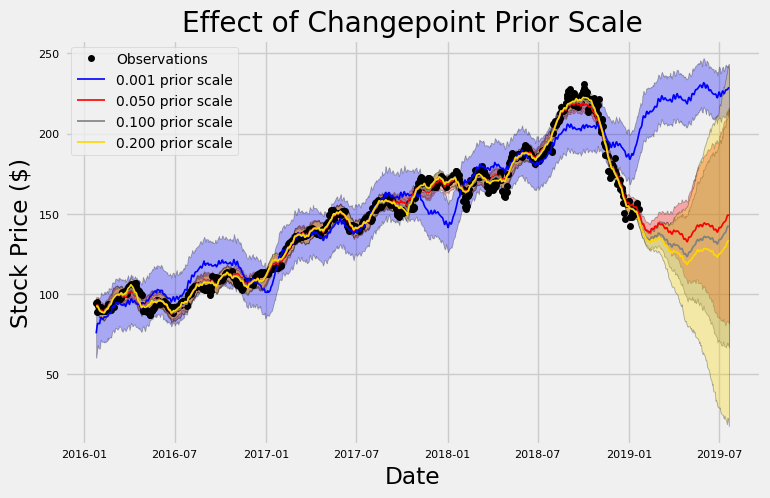

In [11]:
# 我們可以調整短中長期的參數，讓它預測短中長期股價
tsmc.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])


Prediction Range: 2018-01-22 00:00:00 to 2019-01-22 00:00:00.

Predicted price on 2019-01-19 00:00:00 = $219.85.
Actual price on    2019-01-18 00:00:00 = $156.82.

Average Absolute Error on Training Data = $1.73.
Average Absolute Error on Testing  Data = $19.42.

When the model predicted an increase, the price increased 51.27% of the time.
When the model predicted a  decrease, the price decreased  45.65% of the time.

The actual value was within the 80% confidence interval 80.48% of the time.


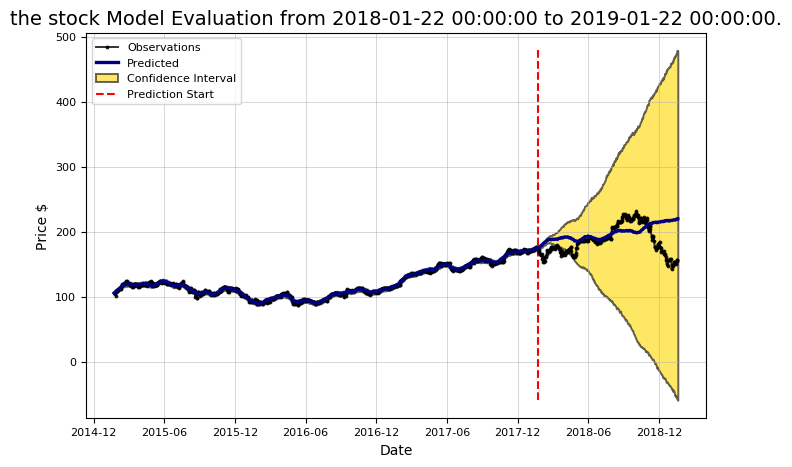

In [12]:
# 我們藉由上述的參數枚舉，可以知道哪一個參數（changepoint_prior）是最好的 我們可以藉由執行predict_future 來預測股價
tsmc.evaluate_prediction()